# Настройка ноутбука

In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Увеличить длинну отображаемых строк
pd.options.display.max_colwidth = 300

# Описание

- [Holtz Yan Graph gallery](https://www.python-graph-gallery.com/)

# Генерация данных

In [4]:
data = pd.DataFrame([
            ['16-10-2021', '23:56:10', 'A', 'a1', '0001', np.random.randint(100)], 
            ['16-10-2021', '23:58:30', 'A', 'a1', '0002', np.random.randint(100)],
            ['16-10-2021', '23:58:35', 'B', 'b1', '0003', np.random.randint(100)],
            ['16-10-2021', '23:58:56', 'B', 'b2', '0004', np.random.randint(100)],
            ['16-10-2021', '23:59:21', 'C', 'c1', '0005', np.random.randint(100)],
            ['16-10-2021', '23:59:42', 'C', 'c1', '0006', np.random.randint(100)],

            ['17-10-2021', '00:03:05', 'A', 'a1', '0007', np.random.randint(100)],
            ['17-10-2021', '00:03:25', 'A', 'a2', '0008', np.random.randint(100)],
            ['17-10-2021', '00:03:48', 'A', 'a3', '0009', np.random.randint(100)],
            ['17-10-2021', '00:05:24', 'B', 'b1', '0010', np.random.randint(100)],
            ['17-10-2021', '00:05:36', 'B', 'b1', '0011', np.random.randint(100)],
            ['17-10-2021', '00:05:44', 'B', 'b2', '0012', np.random.randint(100)],
            ['17-10-2021', '00:06:03', 'B', 'b2', '0013', np.random.randint(100)],
            ['17-10-2021', '03:12:13', 'B', 'b3', '0014', np.random.randint(100)],
            ['17-10-2021', '03:12:46', 'C', 'c1', '0015', np.random.randint(100)],
            ['17-10-2021', '13:06:54', 'C', 'c1', '0016', np.random.randint(100)], 
            ['17-10-2021', '13:12:10', 'C', 'c2', '0017', np.random.randint(100)], 
            ['17-10-2021', '19:48:30', 'C', 'c2', '0018', np.random.randint(100)], 

            ['18-10-2021', '00:06:05', 'C', 'c1', '0019', np.random.randint(100)], 
            ['18-10-2021', '03:08:03', 'C', 'c2', '0020', np.random.randint(100)],
            ['18-10-2021', '12:07:08', 'C', 'c3', '0021', np.random.randint(100)],
    
            ['19-10-2021', '00:04:03', 'A', 'a1', '0022', np.random.randint(100)], 
            ['19-10-2021', '02:08:20', 'A', 'a2', '0023', np.random.randint(100)],
            ['19-10-2021', '10:03:08', 'B', 'a2', '0024', np.random.randint(100)],
            ['19-10-2021', '12:07:08', 'B', 'b1', '0025', np.random.randint(100)],
    
], columns=['str_date', 'str_time','group', 'sub_group','val_id', 'value'])

data['datetime'] = data.apply(lambda row:  dt.datetime.strptime(f'{row.str_date} {row.str_time}', '%d-%m-%Y %H:%M:%S'), axis=1)

data['date'] = data.datetime.dt.date
data['time'] = data.datetime.dt.time
data['week'] = data.datetime.dt.isocalendar().week # Получить номер недели

# data['weekday'] = data.datetime.dt.strftime('%A') 
data['weekday'] = data.datetime.dt.day_name() # Получить день недели (на английском)

datetime_cols = ['datetime', 'date','time','week','weekday']
group_cols = ['group', 'sub_group']
data = data[[*datetime_cols, *group_cols, 'val_id', 'value']]

data.head()

,datetime,date,time,week,weekday,group,sub_group,val_id,value
0,2021-10-16 23:56:10,2021-10-16,23:56:10,41,Saturday,A,a1,0001,68
1,2021-10-16 23:58:30,2021-10-16,23:58:30,41,Saturday,A,a1,0002,93
2,2021-10-16 23:58:35,2021-10-16,23:58:35,41,Saturday,B,b1,0003,22
3,2021-10-16 23:58:56,2021-10-16,23:58:56,41,Saturday,B,b2,0004,27
4,2021-10-16 23:59:21,2021-10-16,23:59:21,41,Saturday,C,c1,0005,45


# Самый быстрый способ визуализировать данные

Есть два способа быстрого построения графиков:
1. Атрибут plot + графический метод
2. Графический метод plot() с указанием типа графика

## Histplot - гистограмма

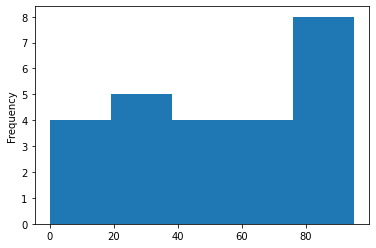

In [5]:
data.value.plot.hist(bins=5);

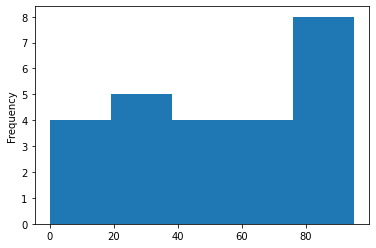

In [6]:
data.value.plot(kind='hist', bins=5);

## Density plot - плотность

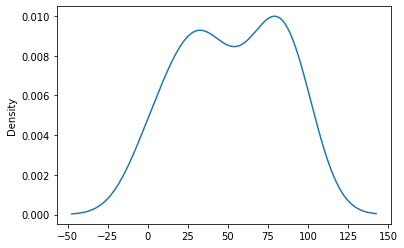

In [7]:
data.value.plot.density();

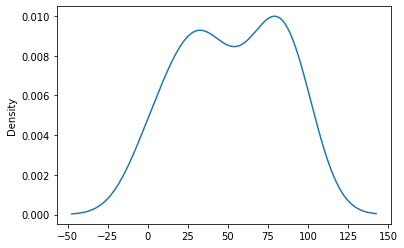

In [8]:
data.value.plot(kind='density');

## Линейный график

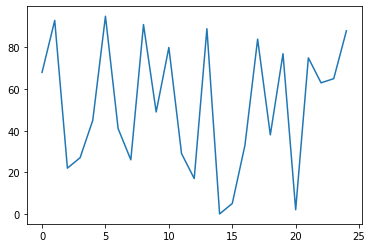

In [9]:
data.value.plot.line();

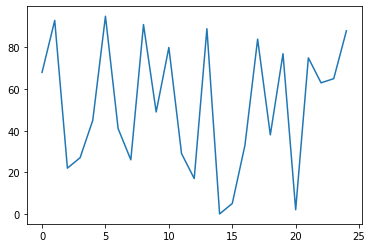

In [10]:
data.value.plot(kind='line');

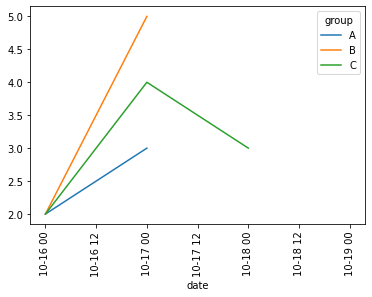

In [11]:
df = data.pivot_table(index='date', columns='group', values='val_id', aggfunc='nunique')

df.plot.line(rot=90);

## Круговая диаграмма

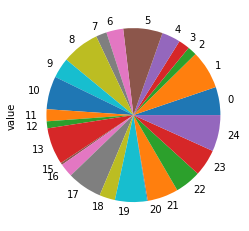

In [12]:
data.value.plot(kind='pie');

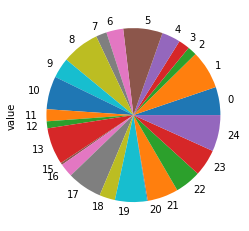

In [13]:
data.value.plot.pie();

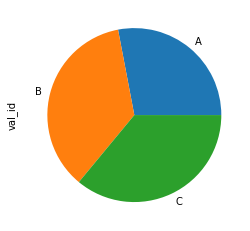

In [14]:
df = data.groupby('group')['val_id'].nunique()

df.plot.pie();

## Столбчатая диаграмма

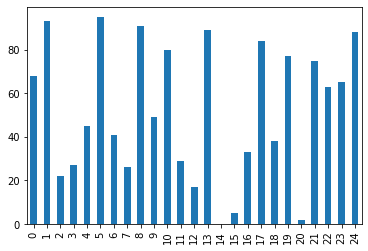

In [15]:
data.value.plot.bar();

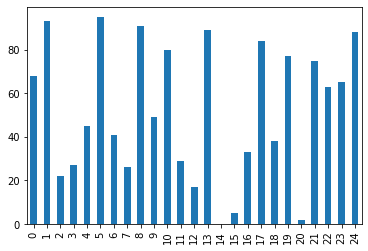

In [16]:
data.value.plot(kind='bar');

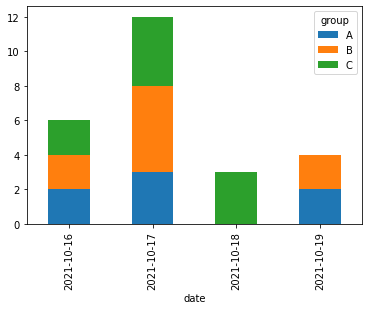

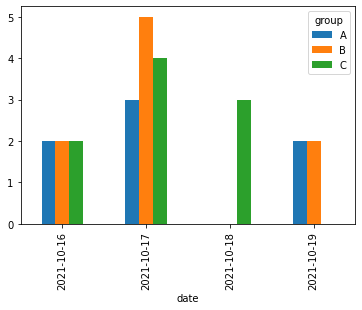

In [17]:
df = data.pivot_table(index='date', columns='group', values='val_id', aggfunc='nunique')
df.plot.bar(stacked=True);
df.plot.bar(stacked=False);

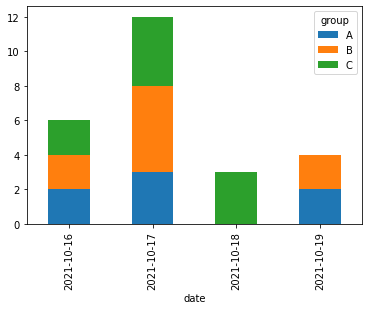

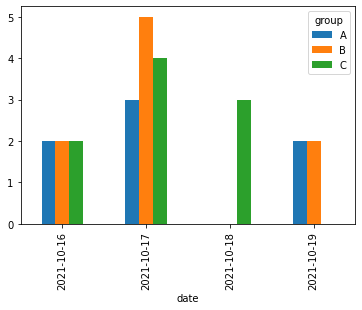

In [18]:
df = data.pivot_table(index='date', columns='group', values='val_id', aggfunc='nunique')
df.plot(kind='bar', stacked=True);
df.plot(kind='bar', stacked=False);

### Кастомные бины

In [19]:
bins = [-1, 0, 20, 40, 60, 80, 100, 1000]

labels = ['0', '0-20', '20-40', '40-60', '60-80', '80-100', '100+']

# С помощью функции pd.cut мы можно легко разделить ряд значений на нужные нам бины. 
custom_value_counts = pd.cut(data['value'], bins=bins, labels=labels).value_counts()
custom_value_counts.index = labels
          
custom_value_counts

0         6
0-20      6
20-40     6
40-60     3
60-80     3
80-100    1
100+      0
Name: count, dtype: int64

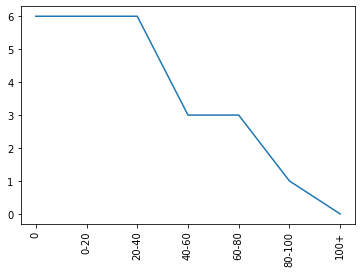

In [20]:
custom_value_counts.plot(rot=90, kind='line');

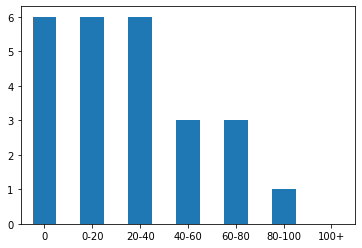

In [21]:
custom_value_counts.plot(rot=0, kind='bar');

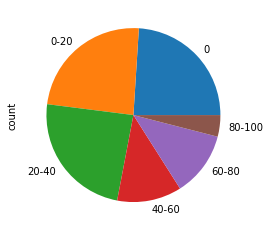

In [22]:
custom_value_counts.plot(rot=0, kind='pie');

## Boxplot

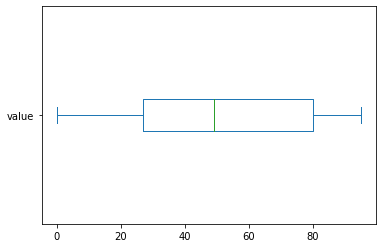

In [23]:
data.value.plot.box(vert=False);

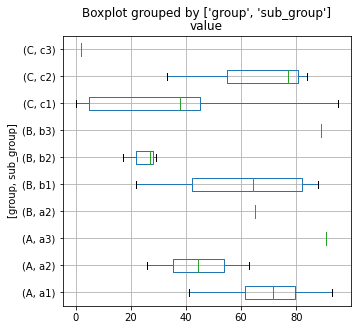

In [24]:
data.boxplot(
    column=['value'], 
    by=['group', 'sub_group'],
    vert=False,
    figsize=(5,5)
);

# Комбинация графиков

## Графики в одной фигуре

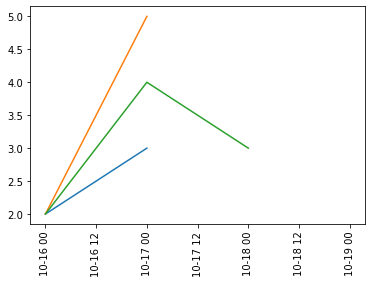

In [25]:
df = data.pivot_table(index='date', columns='group', values='val_id', aggfunc='nunique')

line_1 = df['A']
line_2 = df['B']
line_3 = df['C']

plt.plot(line_1)
plt.plot(line_2)
plt.plot(line_3)

plt.xticks(rotation=90);

## Графики в разных фигурах

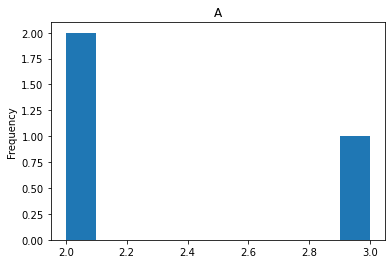

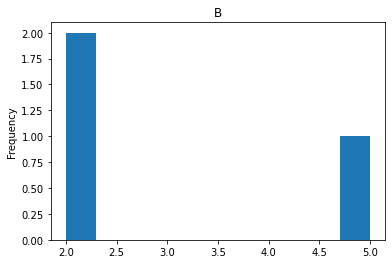

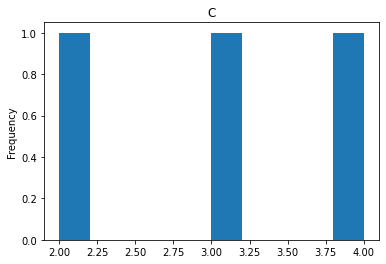

In [26]:
for col in df.columns:
    plt.figure()
    df[col].plot.hist()
    plt.title(col)

## Графики в нескольких subplot-ах

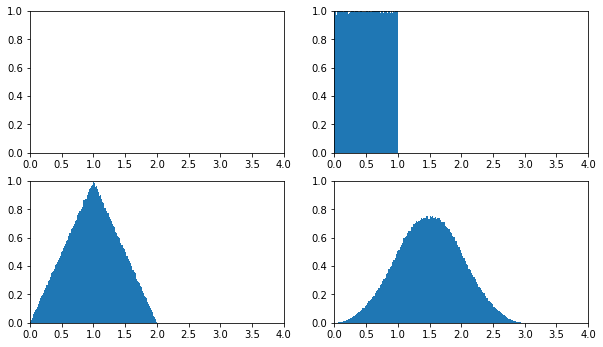

In [27]:
n = 4
d = 1_000_000

heights = np.array([0.0] * d)

plt.figure(figsize=(10, n * 3))
for i in range(n):
    plt.subplot(n, 2, i+1)
    plt.axis([0, n, 0, 1])
    plt.hist(heights, bins=150, density=True)
    heights += np.random.uniform(low=0, high=1, size=(d,))
plt.show()

## Графики в subplot-ах с общими осями

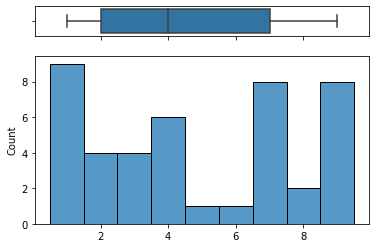

In [28]:
import random

vals = pd.Series([
    *[1] * random.randint(1,10),
    *[2] * random.randint(1,10),
    *[3] * random.randint(1,10),
    *[4] * random.randint(1,10),
    *[5] * random.randint(1,10),
    *[6] * random.randint(1,10),
    *[7] * random.randint(1,10),
    *[8] * random.randint(1,10),
    *[9] * random.randint(1,10),
])

# создаем фигуру из двух объектов-осей (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# добавляем график к каждой оси
sns.boxplot(x=vals, ax=ax_box)
sns.histplot(
    x=vals, 
    ax=ax_hist, 
    discrete=True
)

 
# удаляем ось x для boxplot
ax_box.set(xlabel='')
plt.show()

group,A,B,C
date,,,
2021-10-16,161.0,49.0,140.0
2021-10-17,158.0,264.0,122.0
2021-10-18,0.0,0.0,117.0
2021-10-19,138.0,153.0,0.0


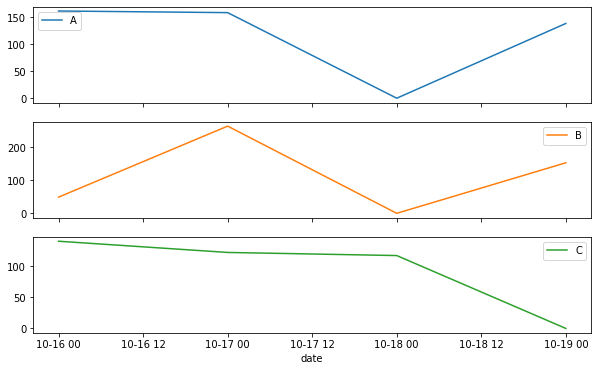

In [39]:
df = data.pivot_table(index='date', columns='group', values='value', aggfunc='sum').fillna(0)
display(df)
df.plot(figsize=(10, 6), subplots=True);

group,A,B,C
sub_group,,,
a1,277.0,0.0,0.0
a2,89.0,65.0,0.0
a3,91.0,0.0,0.0
b1,0.0,239.0,0.0
b2,0.0,73.0,0.0
b3,0.0,89.0,0.0
c1,0.0,0.0,183.0
c2,0.0,0.0,194.0
c3,0.0,0.0,2.0


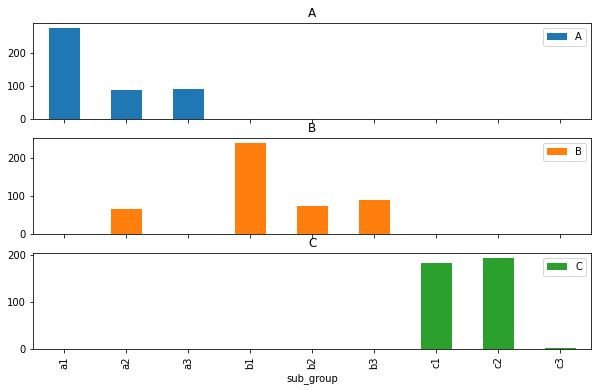

In [51]:
df = data.pivot_table(index='sub_group', columns='group', values='value', aggfunc='sum').fillna(0)
display(df)
df.plot(figsize=(10, 6), subplots=True, kind='bar');

# Кастомные линейные графики

- [LearnPython: How to Plot a Running Average in Python Using matplotlib](https://learnpython.com/blog/average-in-matplotlib/)

In [28]:
dates = pd.date_range(start='09/01/2021', end='10/30/2021')
vals = pd.Series(np.random.choice(range(-100, 100), len(dates), replace=True))
average = vals.rolling(7).mean()

data = pd.DataFrame({'vals': vals, 'average': average}).set_index(dates)

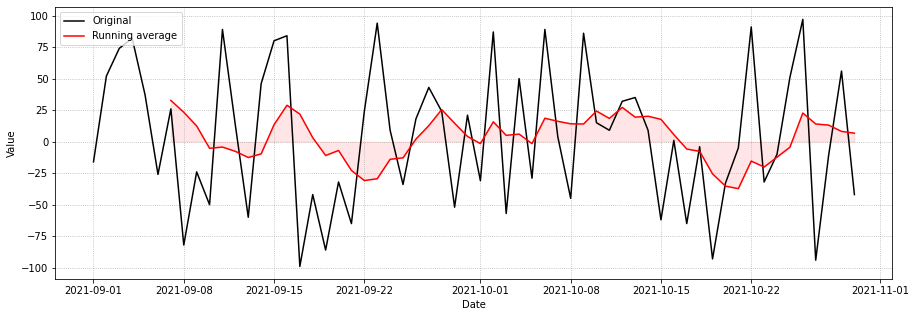

In [29]:
plt.figure(figsize=(15, 5))

plt.plot(data.vals, 'k-', label='Original')
plt.plot(data.average, 'r-', label='Running average')

plt.ylabel('Value')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(data.index, 0, data.average, color='r', alpha=0.1)

plt.legend(loc='upper left')

plt.show()

## Визуализация ошибок

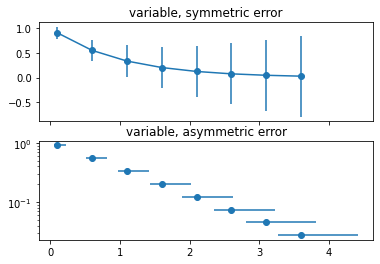

In [6]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x
# error bar values w/ different -/+ errors
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()

In [9]:
pd.DataFrame({
    'lower_error': lower_error,
    'x': x,
    'upper_error': upper_error,
})

,lower_error,x,upper_error
0,0.048,0.1,0.12
1,0.088,0.6,0.22
2,0.128,1.1,0.32
3,0.168,1.6,0.42
4,0.208,2.1,0.52
5,0.248,2.6,0.62
6,0.288,3.1,0.72
7,0.328,3.6,0.82


# Лайфхаки

### Как приблизить область на графике?

In [32]:
mu = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение

# Сгенерим нашу генеральную совокупность
genpop = pd.Series(np.random.normal(mu, sigma, 10_000))

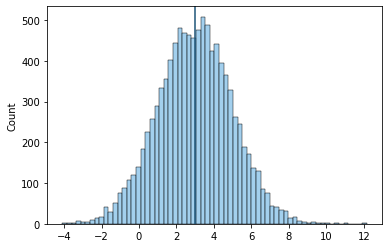

In [36]:
sns.histplot(x=genpop, color='#85C1E9')
plt.axvline(mu, color='#1A5276');

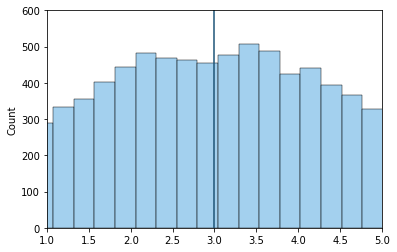

In [38]:
sns.histplot(x=genpop, color='#85C1E9')
plt.axvline(mu, color='#1A5276');

x_min = 1
x_max = 5
y_min = 0
y_max = 600
plt.axis([x_min, x_max, y_min, y_max]);